In [266]:
import pandas as pd
df=pd.read_csv('Healthcare Providers.csv')
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [267]:
df.shape

(100000, 27)

In [268]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [269]:
#Data Cleaning

In [270]:
df = df.drop(columns=['Street Address 2 of the Provider'])

In [271]:
df = df.dropna(subset=['First Name of the Provider', 'Middle Initial of the Provider'], how='all')

In [272]:
most_frequent_gender = df['Gender of the Provider'].mode()[0]
df['Gender of the Provider'] = df['Gender of the Provider'].fillna(most_frequent_gender)

In [273]:
df = df.drop_duplicates()

In [274]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                      0
Middle Initial of the Provider                              25076
Credentials of the Provider                                  2955
Gender of the Provider                                          0
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of S

In [275]:
df = df.drop(columns=['Middle Initial of the Provider'])
df = df.dropna(subset=['Credentials of the Provider'], how='all')
df.isnull().sum()

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS De

In [276]:
df.shape

(92790, 25)

In [277]:
numeric_columns = ['Number of Services', 'Number of Medicare Beneficiaries',
                   'Number of Distinct Medicare Beneficiary/Per Day Services',
                   'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                   'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

In [278]:
#Bivariate Analysis

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

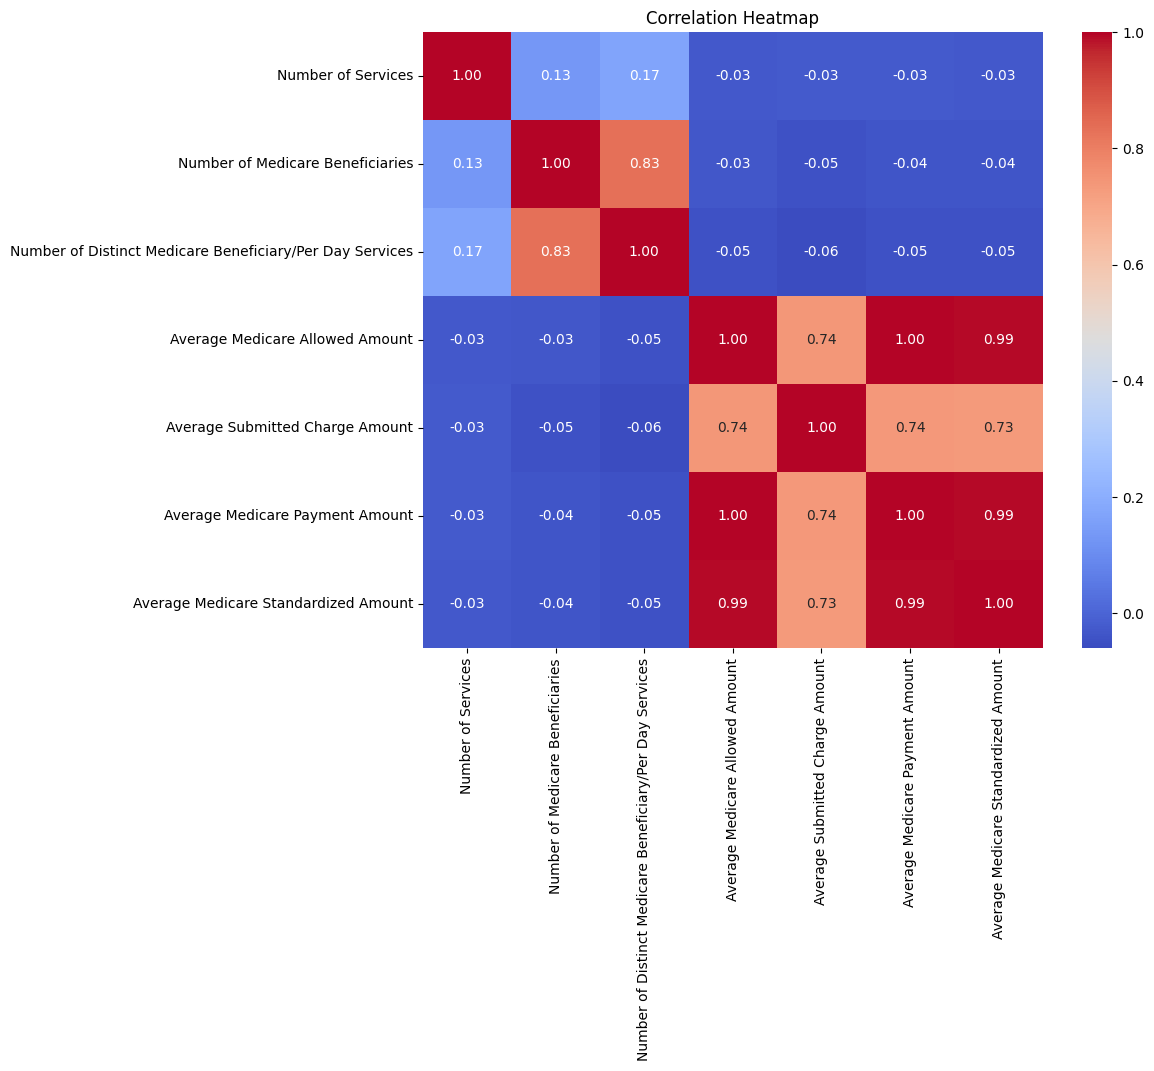

In [280]:
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')


plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

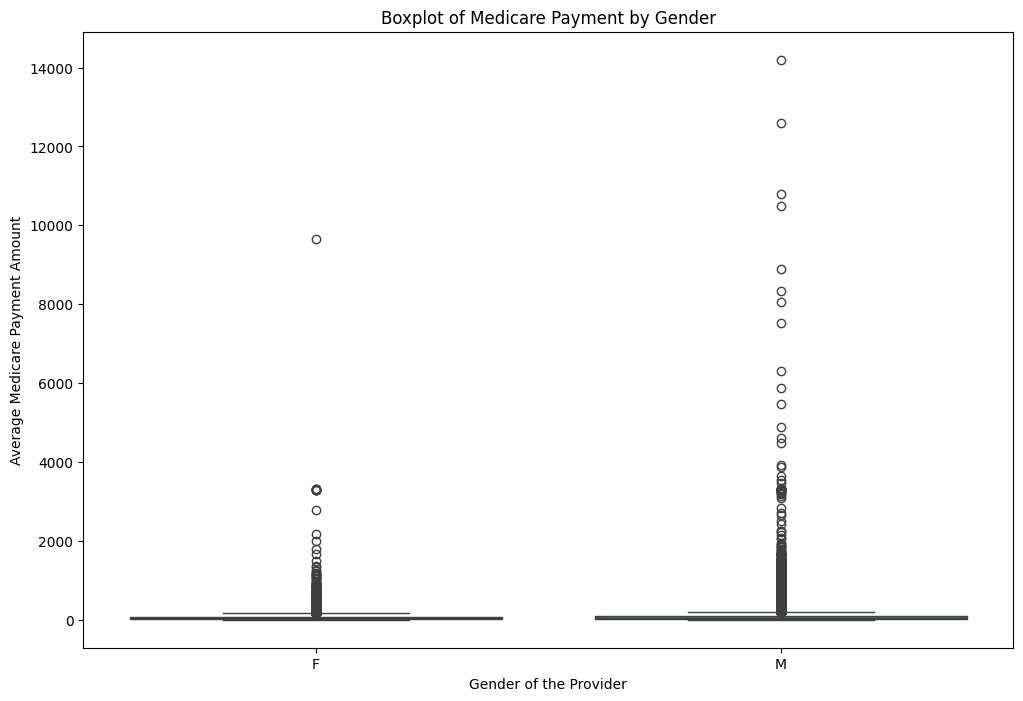

In [281]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Gender of the Provider', y='Average Medicare Payment Amount')
plt.title('Boxplot of Medicare Payment by Gender')
plt.show()

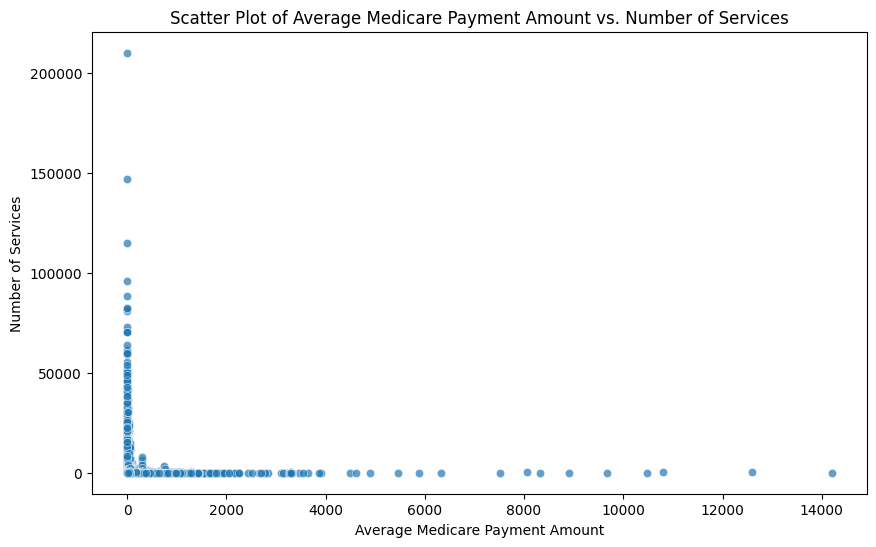

In [282]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average Medicare Payment Amount', y='Number of Services', alpha=0.7)
plt.title('Scatter Plot of Average Medicare Payment Amount vs. Number of Services')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Number of Services')
plt.show()


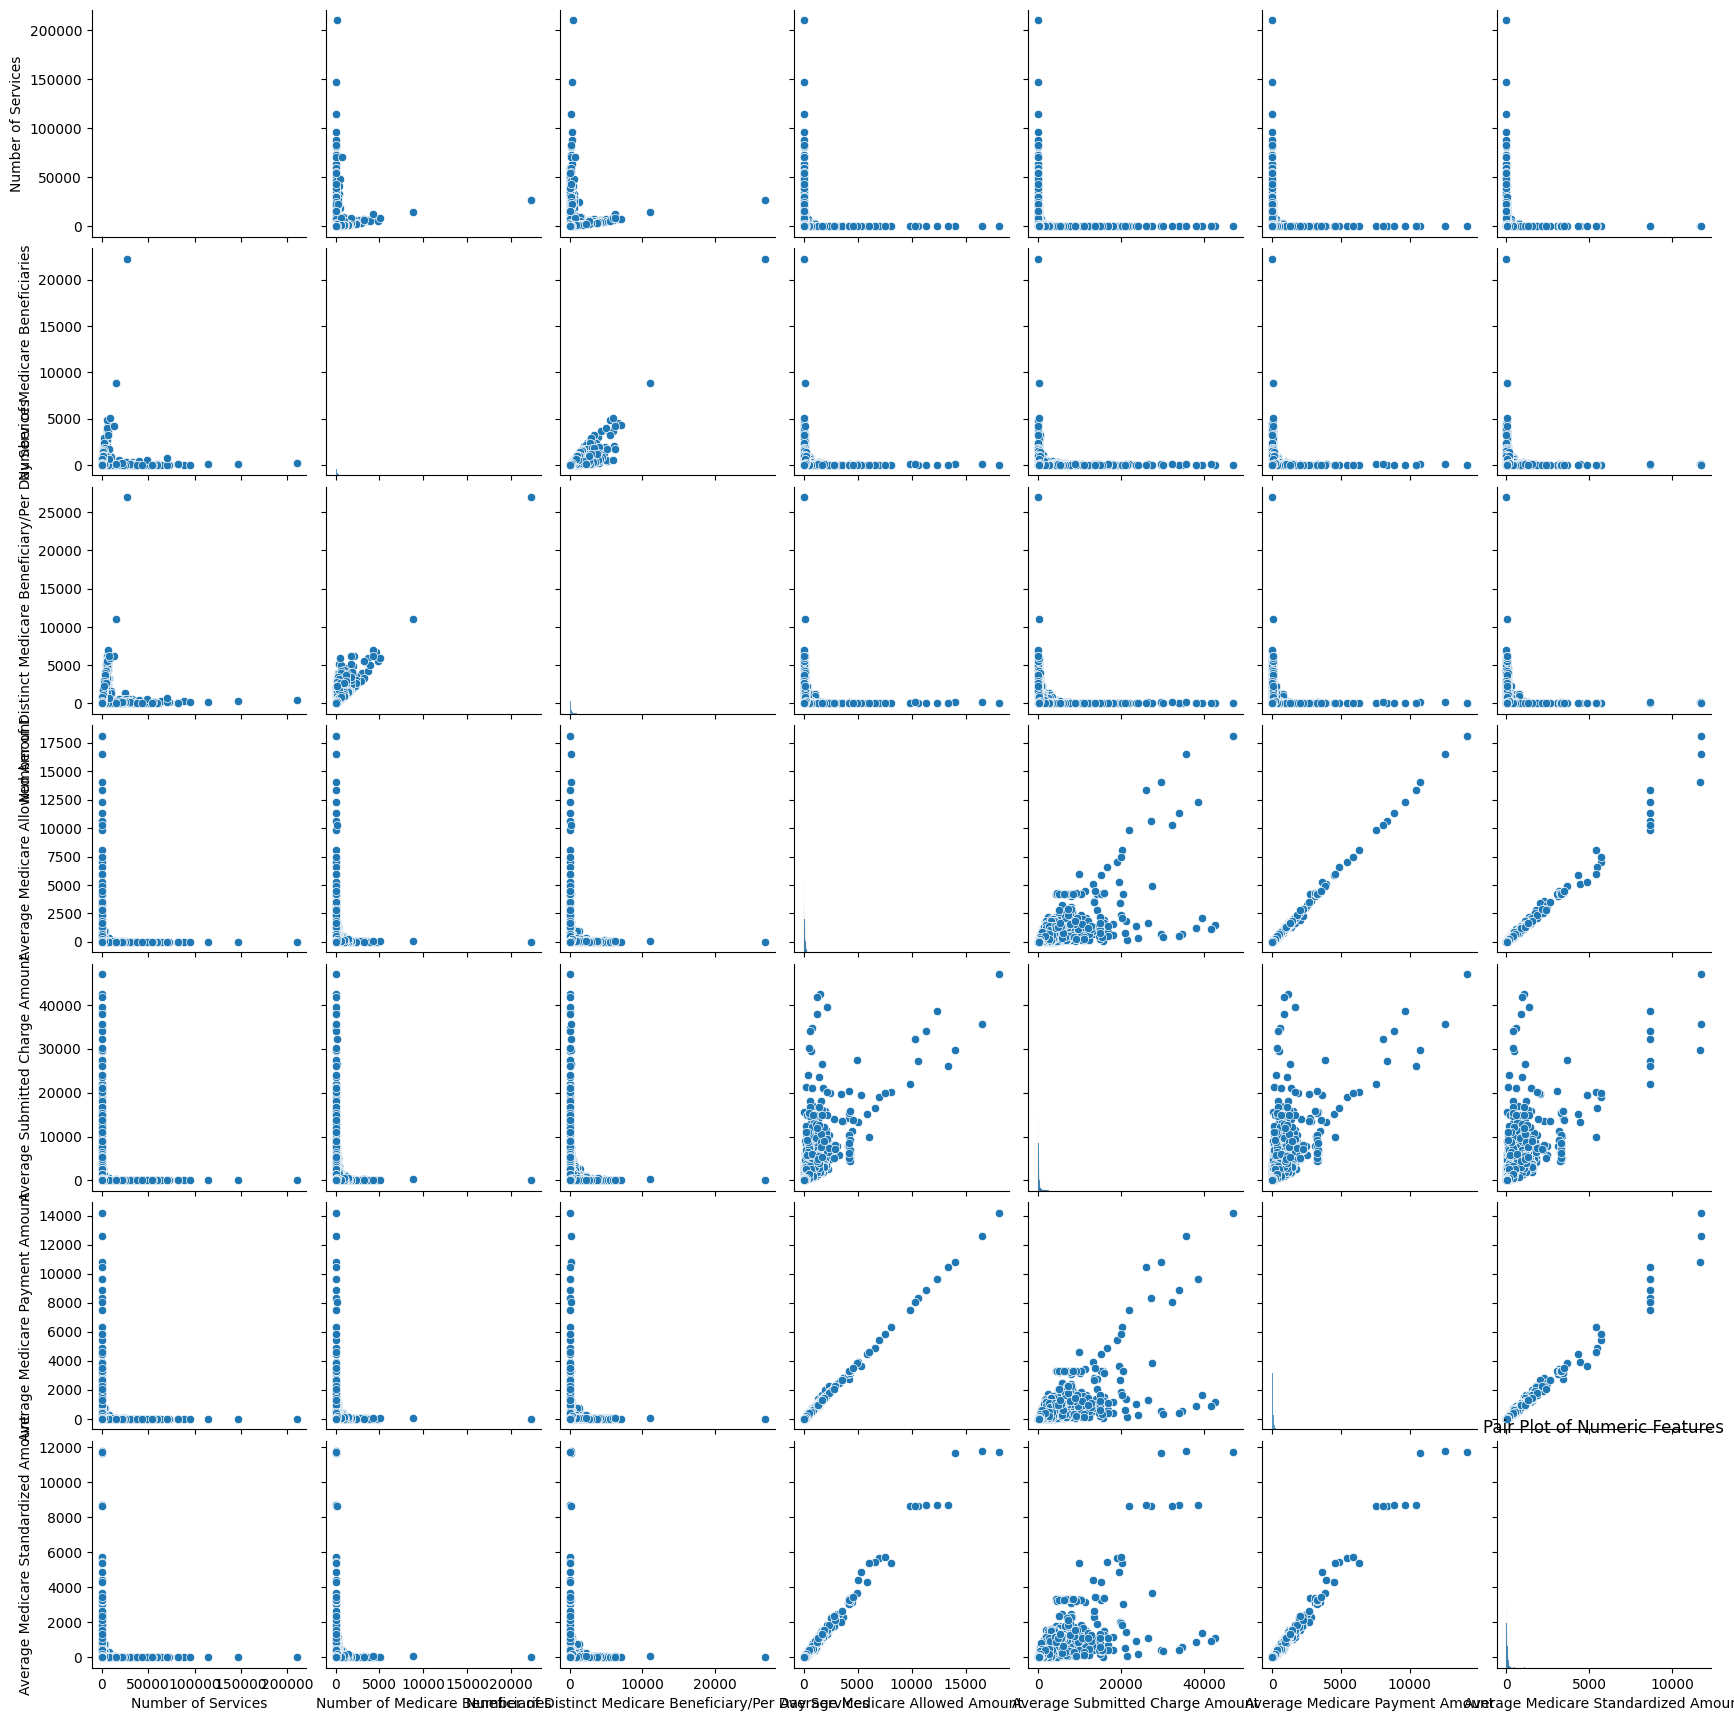

In [283]:
sns.pairplot(df[numeric_columns])
plt.title('Pair Plot of Numeric Features')
plt.show()


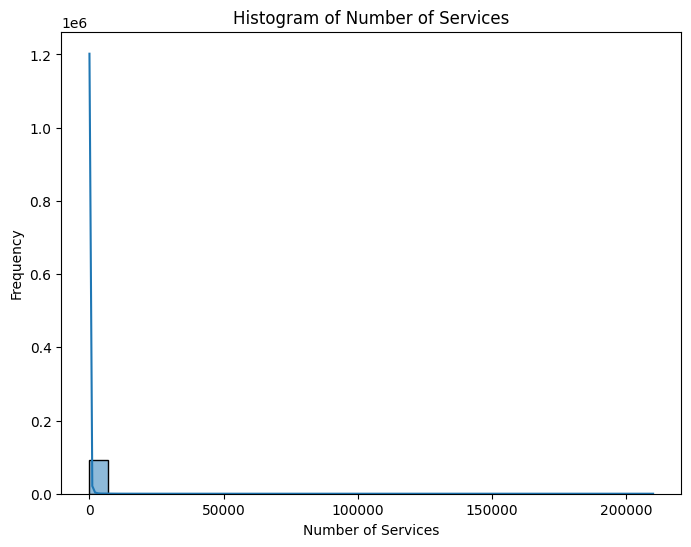

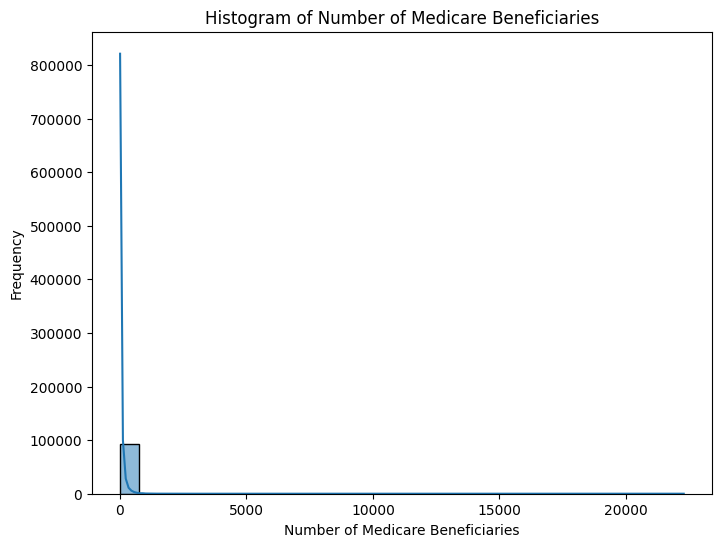

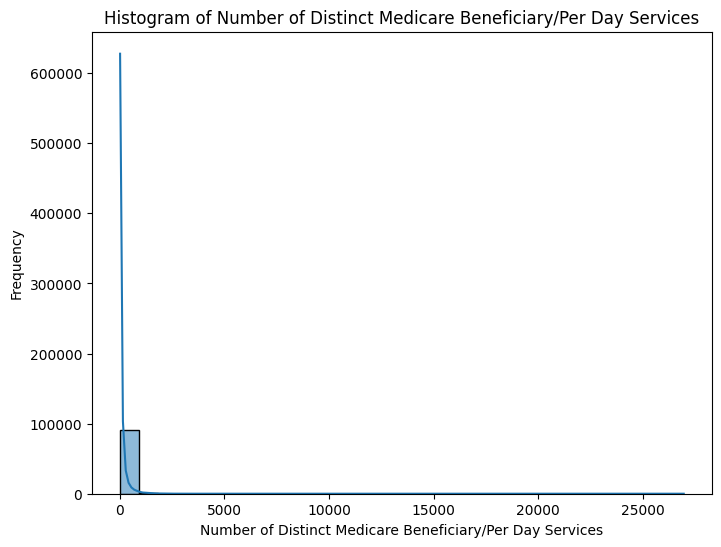

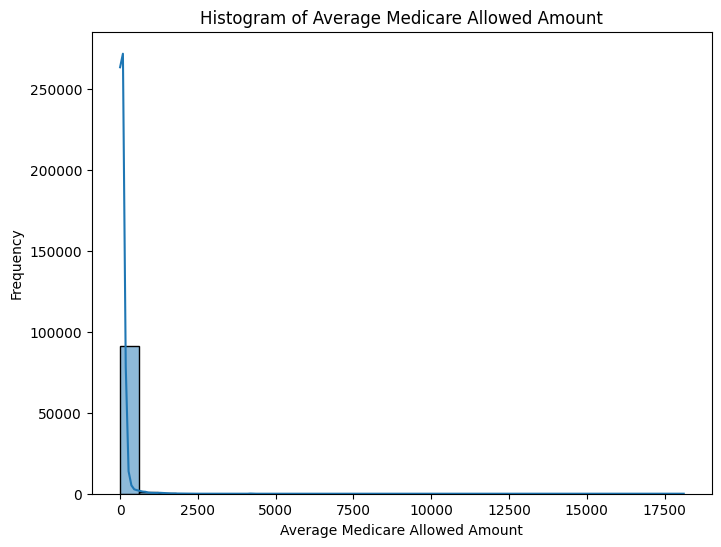

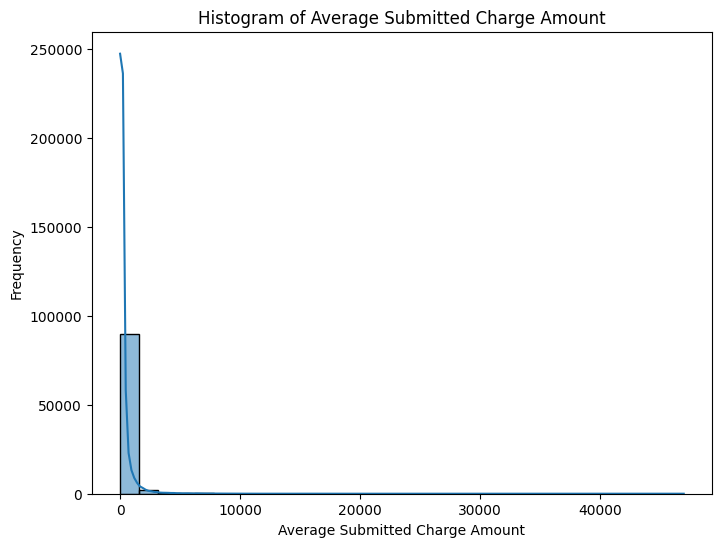

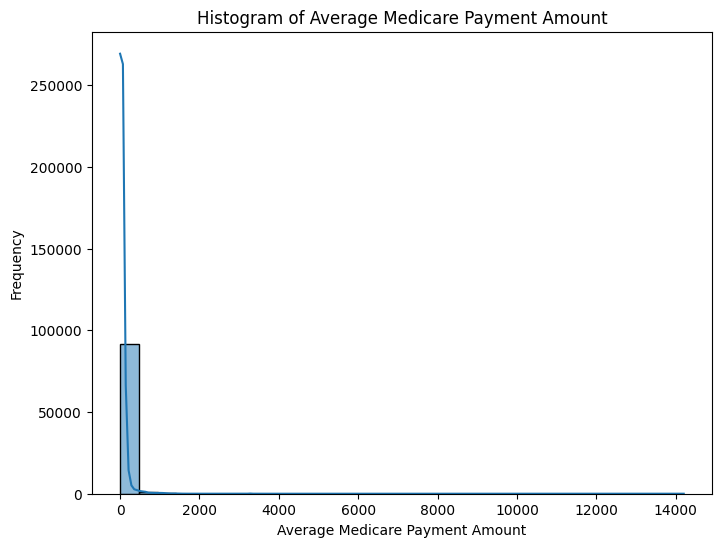

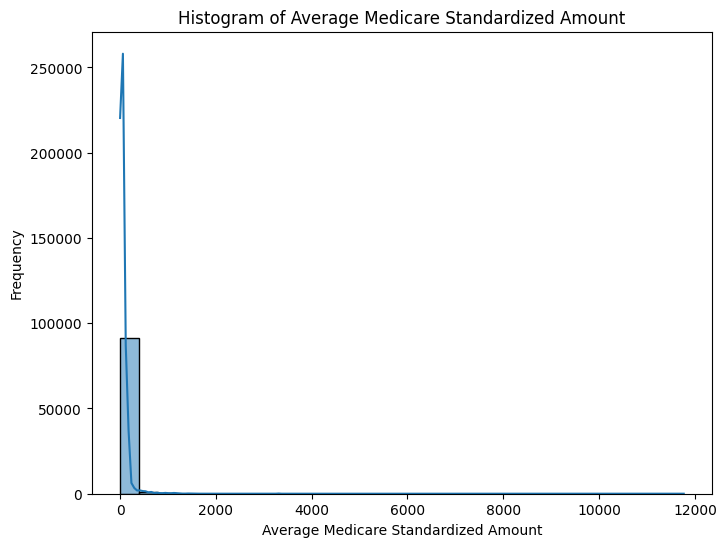

In [284]:
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [285]:
#Univariate analysis

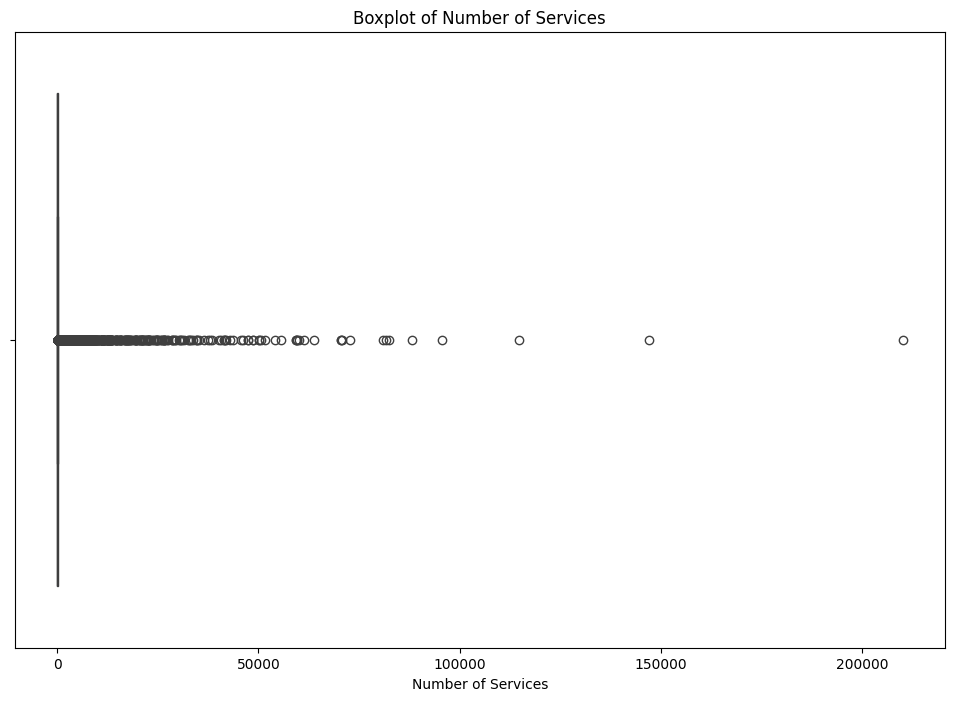

In [286]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Number of Services')
plt.title('Boxplot of Number of Services')
plt.show()

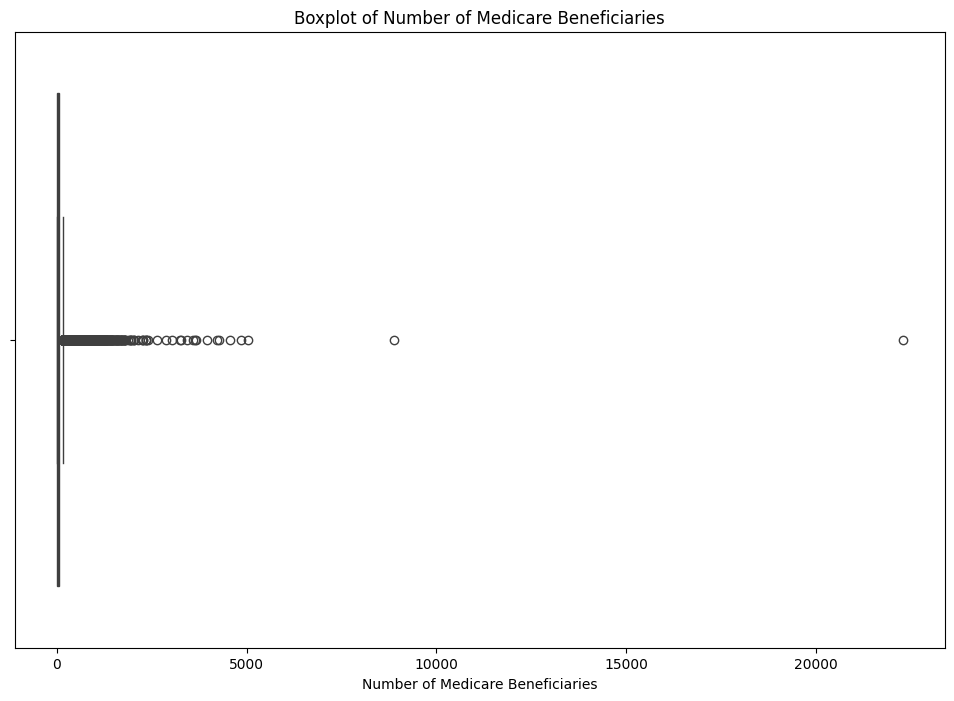

In [287]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Number of Medicare Beneficiaries')
plt.title('Boxplot of Number of Medicare Beneficiaries')
plt.show()

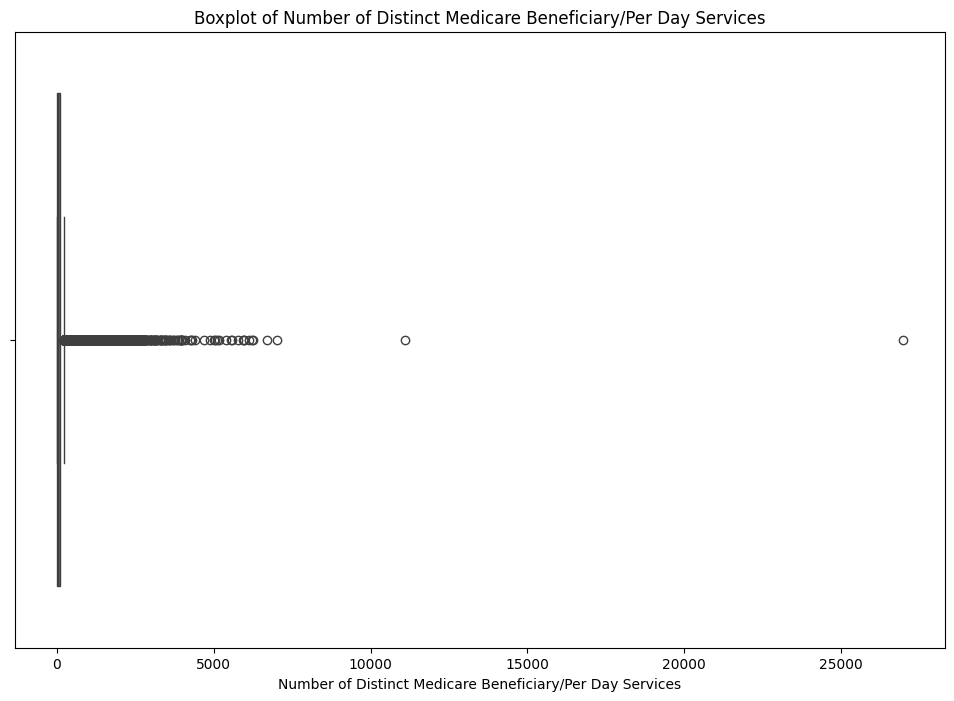

In [288]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Number of Distinct Medicare Beneficiary/Per Day Services')
plt.title('Boxplot of Number of Distinct Medicare Beneficiary/Per Day Services')
plt.show()

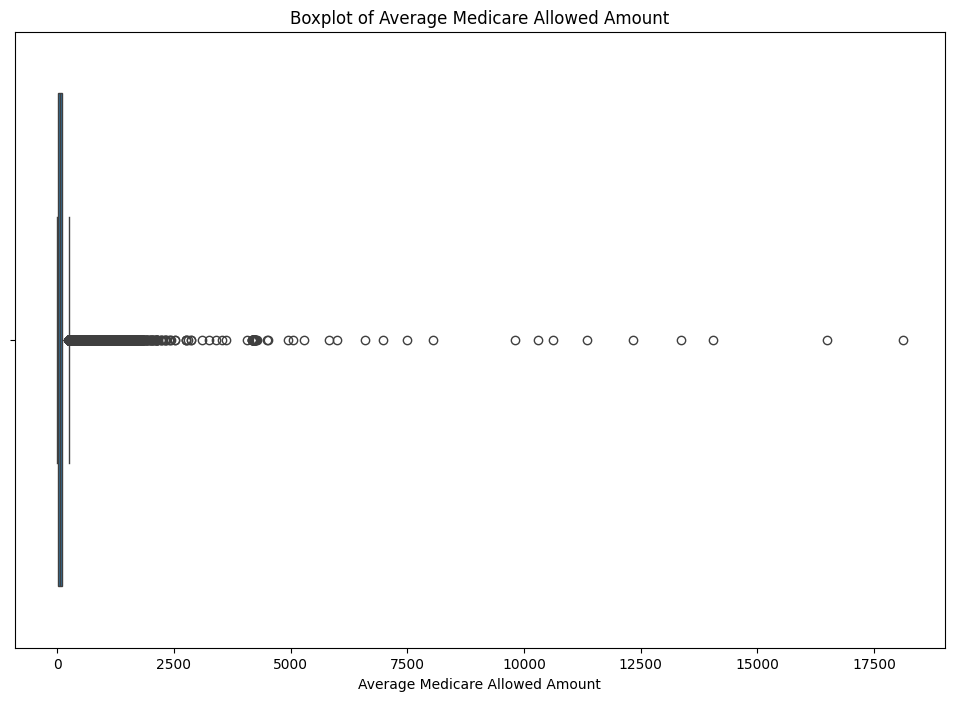

In [289]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Medicare Allowed Amount')
plt.title('Boxplot of Average Medicare Allowed Amount')
plt.show()

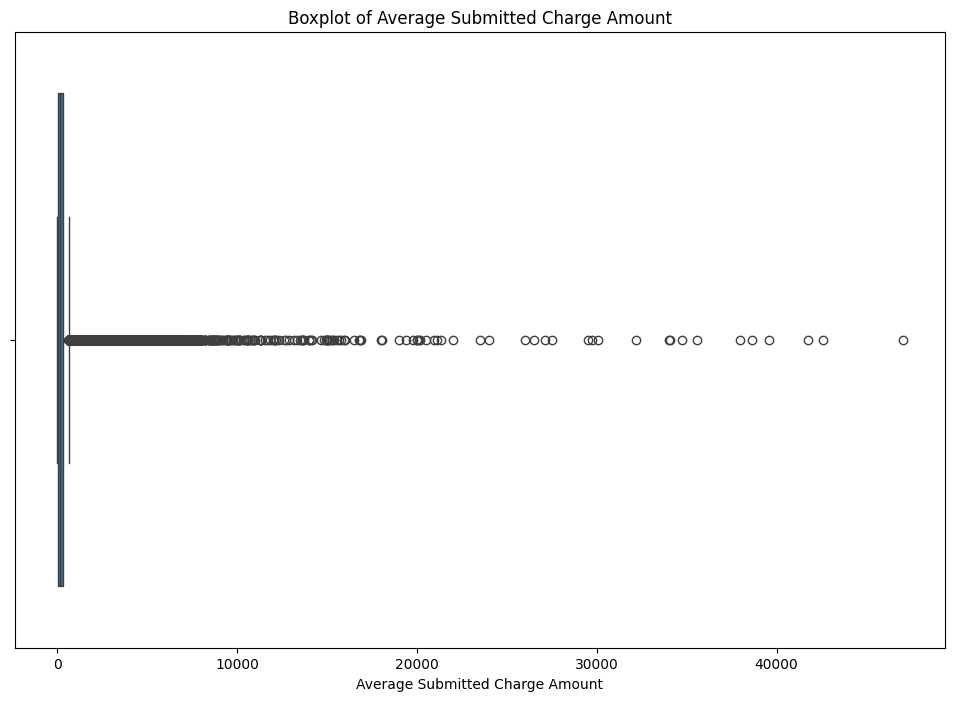

In [290]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Submitted Charge Amount')
plt.title('Boxplot of Average Submitted Charge Amount')
plt.show()

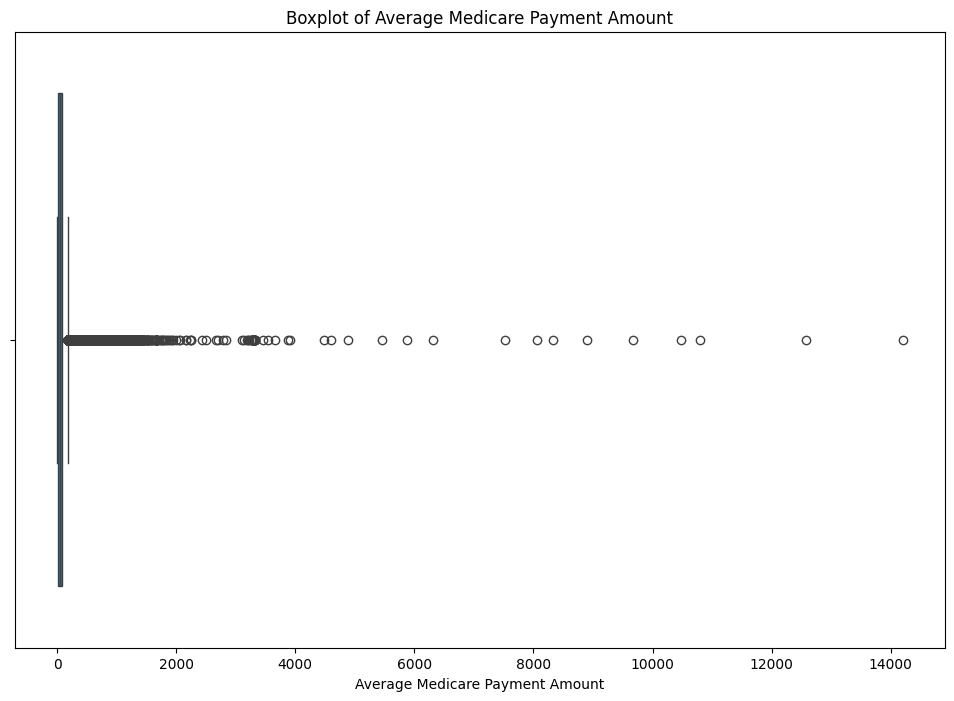

In [291]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Medicare Payment Amount')
plt.title('Boxplot of Average Medicare Payment Amount')
plt.show()

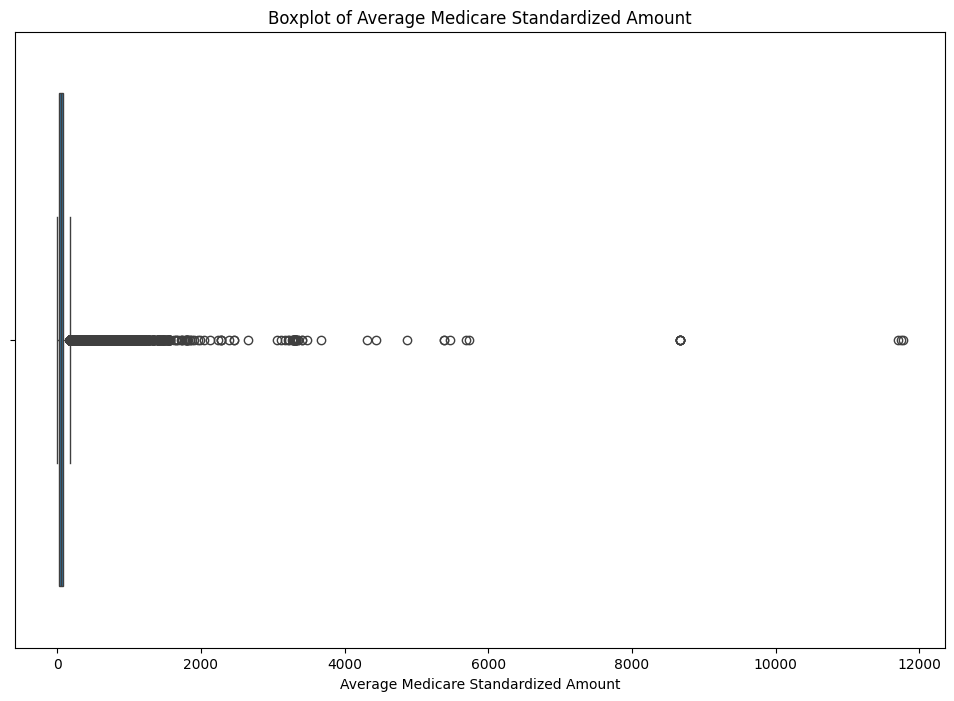

In [292]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Average Medicare Standardized Amount')
plt.title('Boxplot of Average Medicare Standardized Amount')
plt.show()

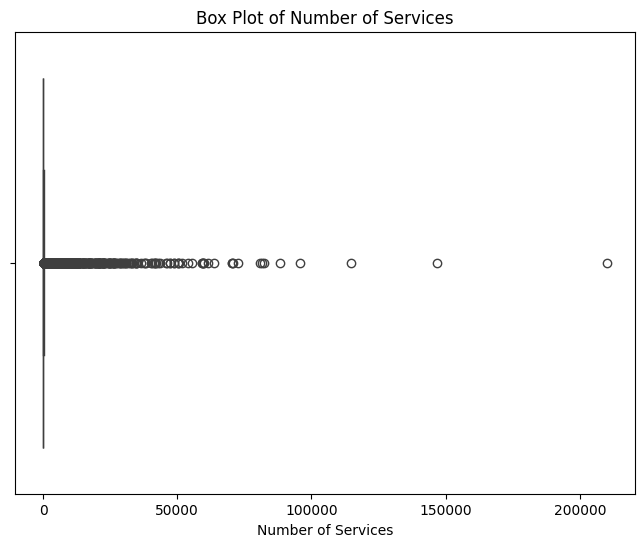

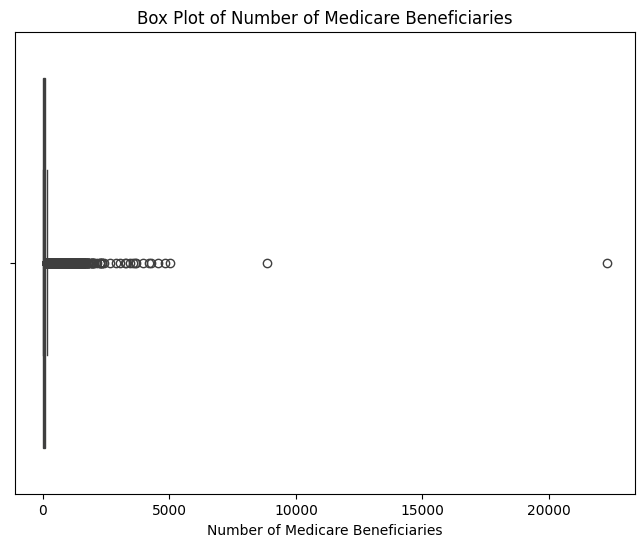

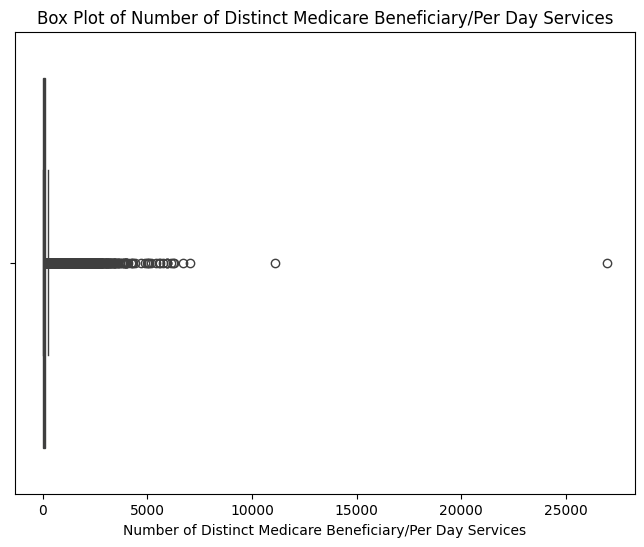

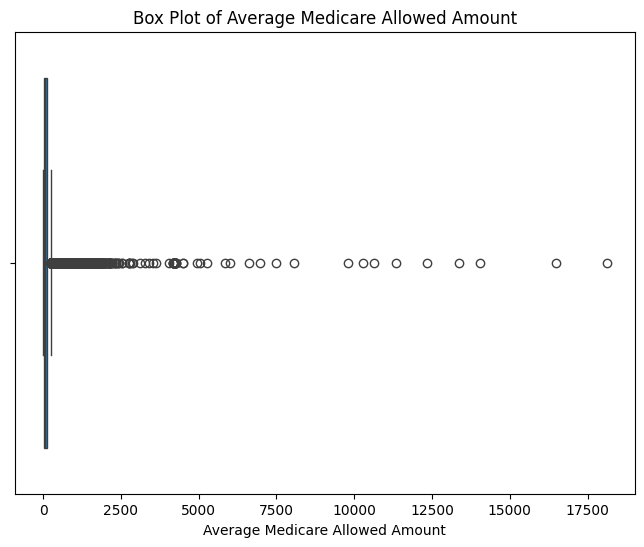

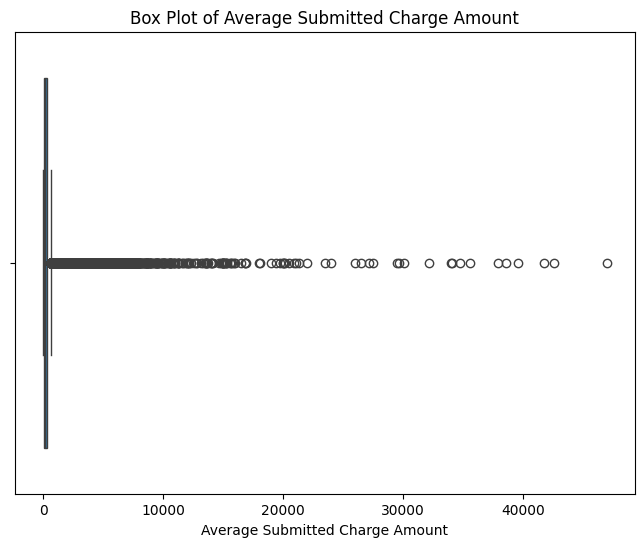

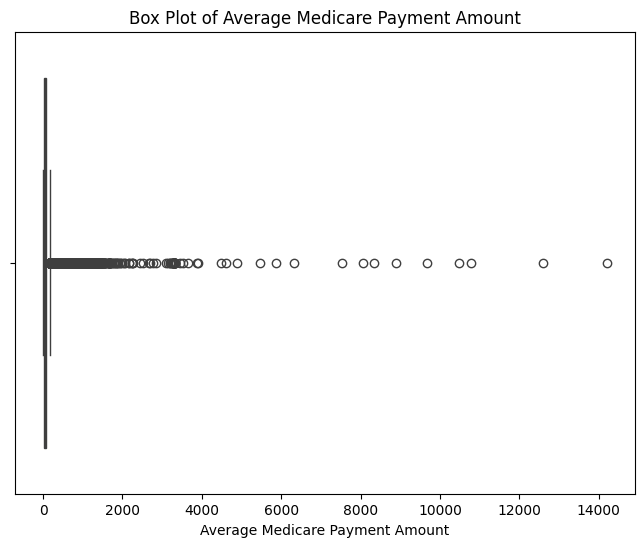

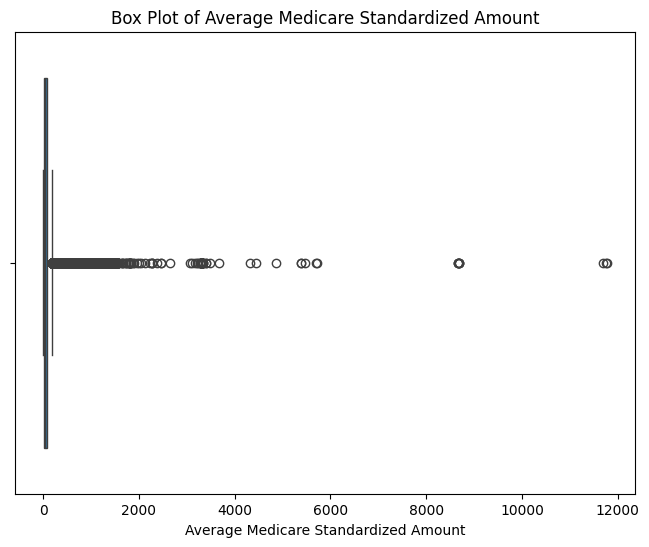

In [293]:
for col in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()

In [294]:
def iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numeric_columns:
    df = iqr(df, col)

In [295]:
def iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) |  (df[column] > upper_bound)]
    total_values = len(df[column])
    percentage = (len(outliers) / total_values) * 100

    return len(outliers),percentage

outlier_summary={}
for col in numeric_columns:
    outlier,percentage = iqr(df, col)
    outlier_summary[col] = percentage
    print(f"{col}:-Number of Outliers: {outlier},Percentage of Outliers: {percentage:.2f}%")
    print()

Number of Services:-Number of Outliers: 1195,Percentage of Outliers: 2.02%

Number of Medicare Beneficiaries:-Number of Outliers: 2896,Percentage of Outliers: 4.89%

Number of Distinct Medicare Beneficiary/Per Day Services:-Number of Outliers: 1669,Percentage of Outliers: 2.82%

Average Medicare Allowed Amount:-Number of Outliers: 160,Percentage of Outliers: 0.27%

Average Submitted Charge Amount:-Number of Outliers: 1921,Percentage of Outliers: 3.25%

Average Medicare Payment Amount:-Number of Outliers: 315,Percentage of Outliers: 0.53%

Average Medicare Standardized Amount:-Number of Outliers: 216,Percentage of Outliers: 0.36%



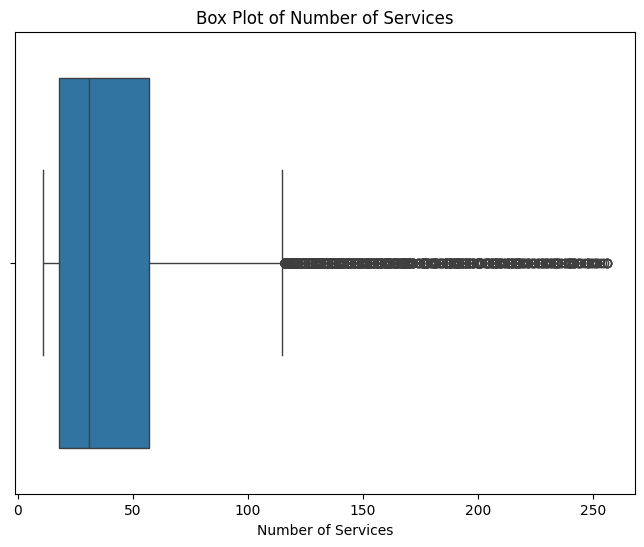

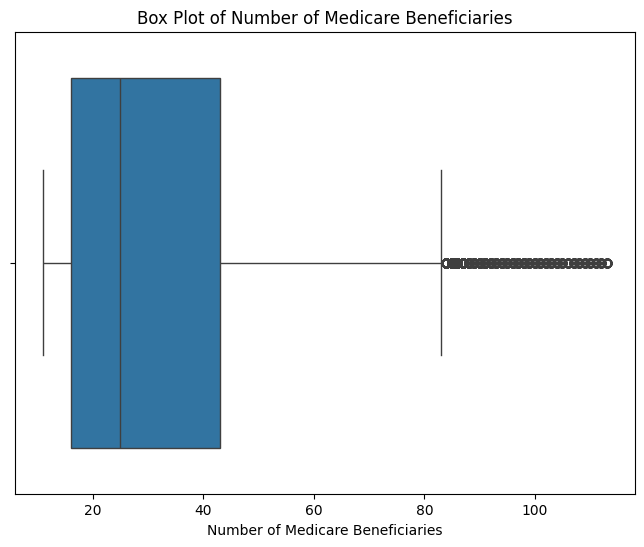

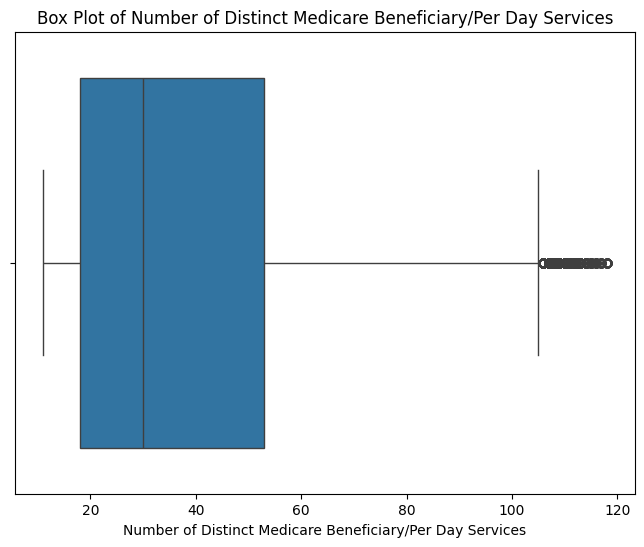

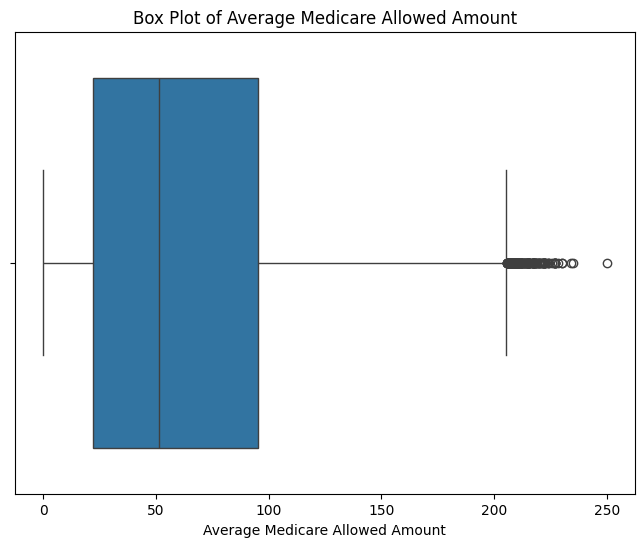

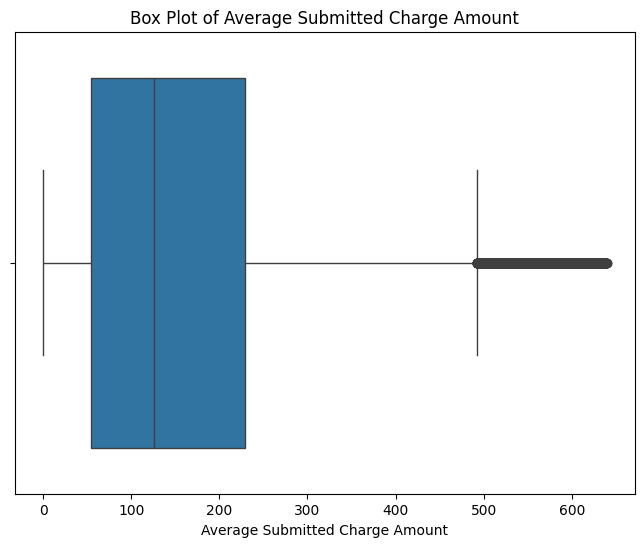

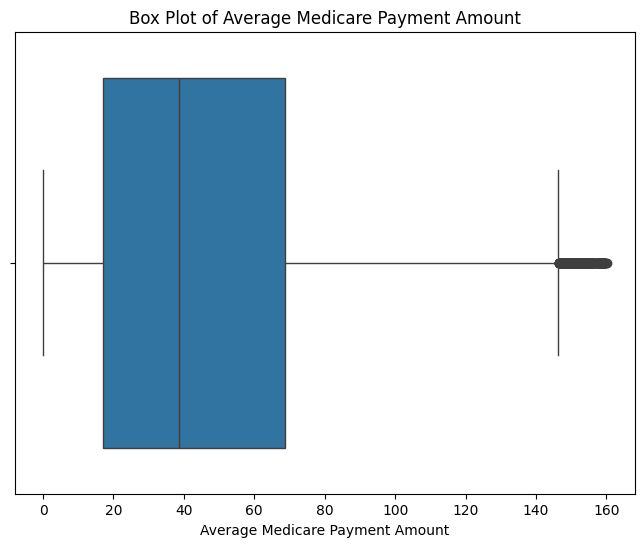

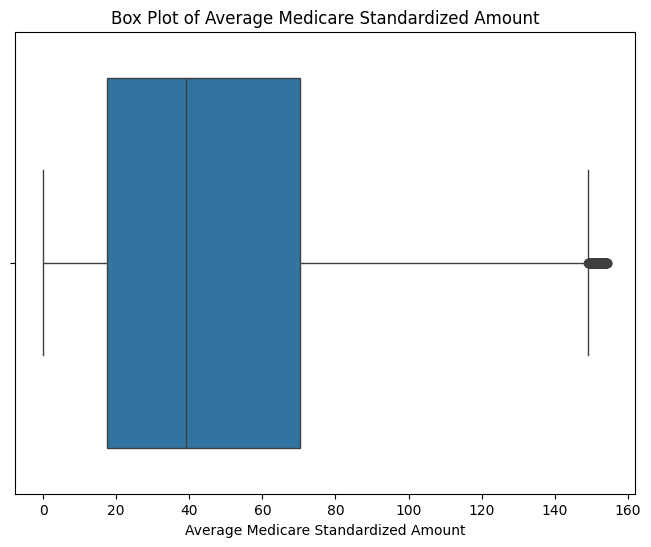

In [296]:

for col in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.show()


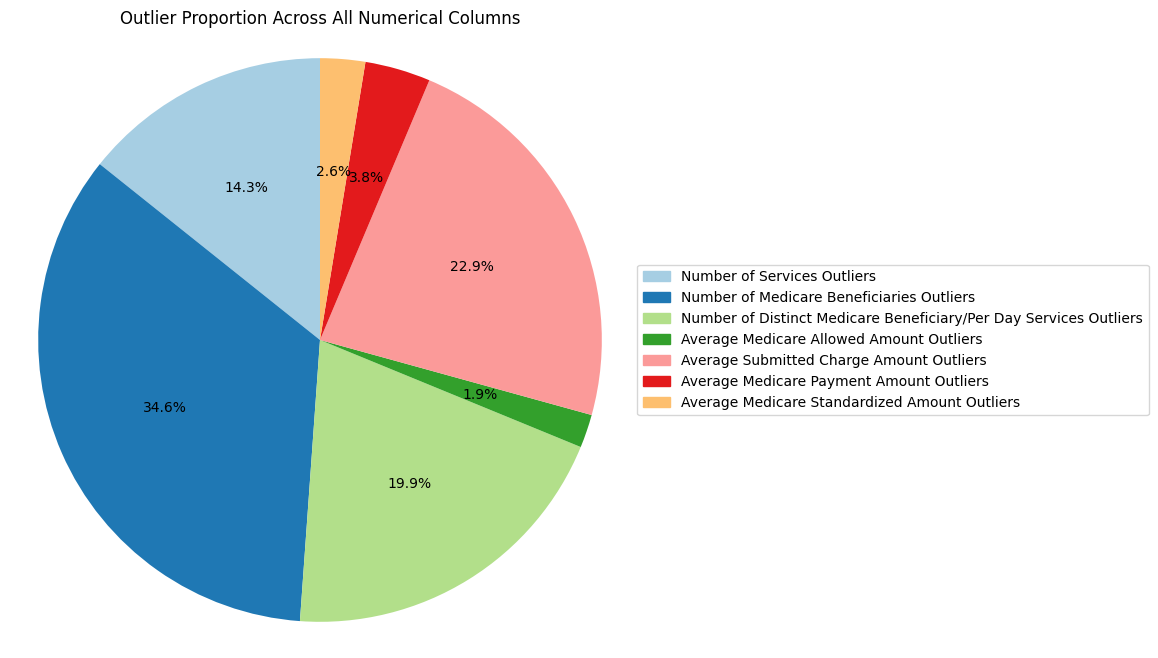

In [297]:
import matplotlib.patches as mpatches
labels = [f'{col} Outliers' for col in outlier_summary.keys()]
sizes = [percentage for percentage in outlier_summary.values()]
colors = plt.cm.Paired(range(len(outlier_summary)))

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Outlier Proportion Across All Numerical Columns')
plt.axis('equal')

legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [298]:
import numpy as np
def z_score(df, column, threshold):
    mean = df[column].mean()
    std = df[column].std()
    df['z_score'] = (df[column] - mean) / std
    return df[np.abs(df['z_score']) <= threshold].drop(columns=['z_score'])

for col in numeric_columns:
    df = z_score(df, col,3)

In [299]:
import numpy as np

def z_score(df, column, threshold):
    mean = df[column].mean()
    std = df[column].std()
    df['z_score'] = (df[column] - mean) / std

    outliers = df[(df['z_score'] > threshold) | (df['z_score'] < -threshold)]
    total_values = len(df[column])
    percentage = (len(outliers) / total_values) * 100
    df = df.drop(columns=['z_score'])
    return len(outliers), percentage

outlier_summary = {}
for col in numeric_columns:
    outlier, percentage = z_score(df, col,3)
    outlier_summary[col] = percentage
    print(f"{col}:- Number of Outliers: {outlier}, Percentage of Outliers: {percentage:.2f}%")
    print()


Number of Services:- Number of Outliers: 254, Percentage of Outliers: 0.45%

Number of Medicare Beneficiaries:- Number of Outliers: 636, Percentage of Outliers: 1.13%

Number of Distinct Medicare Beneficiary/Per Day Services:- Number of Outliers: 145, Percentage of Outliers: 0.26%

Average Medicare Allowed Amount:- Number of Outliers: 55, Percentage of Outliers: 0.10%

Average Submitted Charge Amount:- Number of Outliers: 465, Percentage of Outliers: 0.83%

Average Medicare Payment Amount:- Number of Outliers: 36, Percentage of Outliers: 0.06%

Average Medicare Standardized Amount:- Number of Outliers: 11, Percentage of Outliers: 0.02%



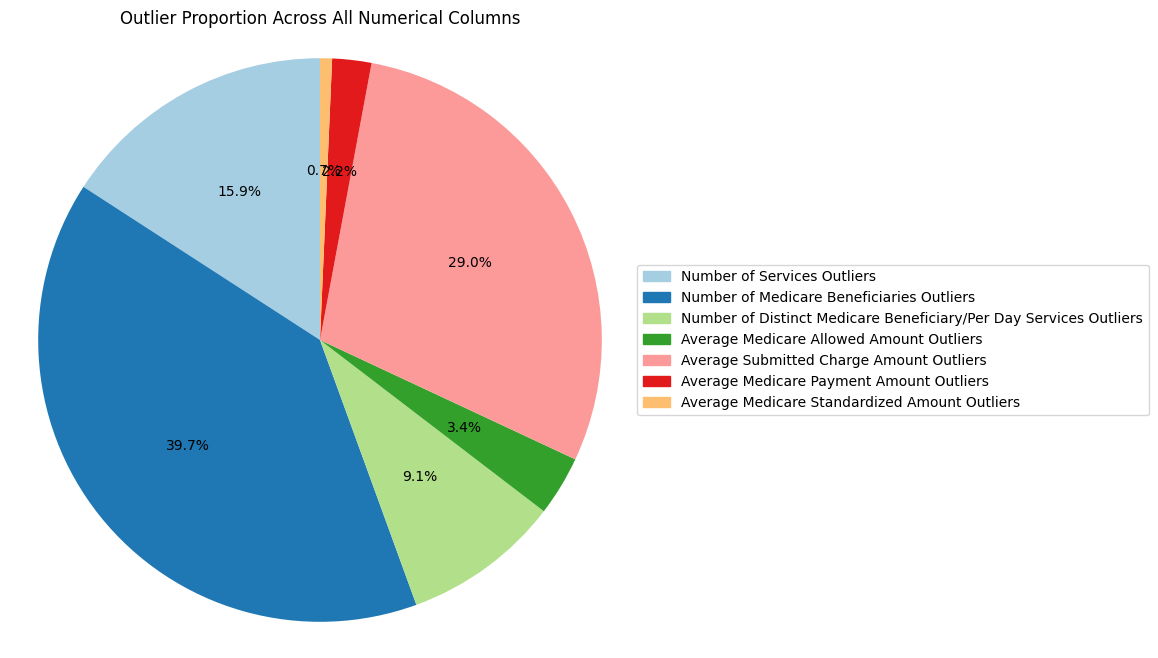

In [300]:
import matplotlib.patches as mpatches
labels = [f'{col} Outliers' for col in outlier_summary.keys()]
sizes = [percentage for percentage in outlier_summary.values()]
colors = plt.cm.Paired(range(len(outlier_summary)))

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Outlier Proportion Across All Numerical Columns')
plt.axis('equal')

legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [301]:
# One-hot encoding the selected categorical columns

import numpy as np

categorical_columns = [
    'Gender of the Provider',
    'Entity Type of the Provider',
    'Provider Type',
    'Medicare Participation Indicator',
    'Place of Service',
    'HCPCS Drug Indicator'
]

encoded_df = pd.get_dummies(df[categorical_columns], drop_first=True)
encoded_df = encoded_df.astype(int).to_numpy()
encoded_df = pd.DataFrame(encoded_df, columns=pd.get_dummies(df[categorical_columns], drop_first=True).columns)

In [302]:
encoded_df.head()

,Gender of the Provider_M,Provider Type_Advanced Heart Failure and Transplant Cardiology,Provider Type_Allergy/ Immunology,Provider Type_Anesthesiology,Provider Type_Anesthesiology Assistant,Provider Type_Audiologist,Provider Type_Cardiac Surgery,Provider Type_Cardiology,Provider Type_Certified Clinical Nurse Specialist,Provider Type_Certified Nurse Midwife,...,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Undefined Physician type,Provider Type_Urology,Provider Type_Vascular Surgery,Medicare Participation Indicator_Y,Place of Service_O,HCPCS Drug Indicator_Y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [303]:
# Standardizing the numeric columns
from sklearn.preprocessing import StandardScaler
numeric_columns = df[['Number of Services', 'Number of Medicare Beneficiaries',
                      'Number of Distinct Medicare Beneficiary/Per Day Services',
                      'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                      'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]

scaler = StandardScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)
scaled_numeric = scaled_numeric.round(2)

In [304]:
scaled_numeric.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,-0.27,-0.89,-0.22,0.65,0.01,0.57,0.43
1,-0.72,-0.65,-0.70,-1.23,-1.22,-1.22,-1.22
2,-0.23,-0.36,-0.26,-0.74,-0.93,-0.75,-0.77
3,-0.68,-0.60,-0.66,-0.32,0.08,-0.26,-0.23
4,0.49,0.89,0.58,-0.68,-0.85,-0.48,-0.59


In [305]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = df[['Number of Services', 'Number of Medicare Beneficiaries',
                      'Number of Distinct Medicare Beneficiary/Per Day Services',
                      'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                      'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]

scaler2 = MinMaxScaler()
scaled_numeric2 = pd.DataFrame(scaler2.fit_transform(numeric_columns), columns=numeric_columns.columns)

scaled_numeric2 = scaled_numeric.round(2)

In [306]:
scaled_numeric2.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,-0.27,-0.89,-0.22,0.65,0.01,0.57,0.43
1,-0.72,-0.65,-0.70,-1.23,-1.22,-1.22,-1.22
2,-0.23,-0.36,-0.26,-0.74,-0.93,-0.75,-0.77
3,-0.68,-0.60,-0.66,-0.32,0.08,-0.26,-0.23
4,0.49,0.89,0.58,-0.68,-0.85,-0.48,-0.59


In [307]:
final_df = pd.concat([scaled_numeric, encoded_df], axis=1)
final_df.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Provider Type_Advanced Heart Failure and Transplant Cardiology,Provider Type_Allergy/ Immunology,...,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Undefined Physician type,Provider Type_Urology,Provider Type_Vascular Surgery,Medicare Participation Indicator_Y,Place of Service_O,HCPCS Drug Indicator_Y
0,-0.27,-0.89,-0.22,0.65,0.01,0.57,0.43,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.72,-0.65,-0.70,-1.23,-1.22,-1.22,-1.22,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.23,-0.36,-0.26,-0.74,-0.93,-0.75,-0.77,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,-0.68,-0.60,-0.66,-0.32,0.08,-0.26,-0.23,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.49,0.89,0.58,-0.68,-0.85,-0.48,-0.59,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [308]:
categorical_col=[
    'Credentials of the Provider',
    'Gender of the Provider',
    'Entity Type of the Provider',
    'City of the Provider',
    'State Code of the Provider',
    'Country Code of the Provider',
    'Provider Type',
    'Medicare Participation Indicator',
    'Place of Service',
    'HCPCS Code',
    'HCPCS Description',
    'HCPCS Drug Indicator'
]

In [309]:
for col in categorical_col:
    unique_count = df[col].nunique()
    print(f"Number of unique values in '{col}': {unique_count}")

Number of unique values in 'Credentials of the Provider': 1318
Number of unique values in 'Gender of the Provider': 2
Number of unique values in 'Entity Type of the Provider': 1
Number of unique values in 'City of the Provider': 4805
Number of unique values in 'State Code of the Provider': 57
Number of unique values in 'Country Code of the Provider': 4
Number of unique values in 'Provider Type': 80
Number of unique values in 'Medicare Participation Indicator': 2
Number of unique values in 'Place of Service': 2
Number of unique values in 'HCPCS Code': 1580
Number of unique values in 'HCPCS Description': 1489
Number of unique values in 'HCPCS Drug Indicator': 2


In [310]:
#Binary Encoding
import category_encoders as ce
binary_col=[
    'Gender of the Provider',
    'Medicare Participation Indicator',
    'Place of Service',
    'HCPCS Drug Indicator'
]

binary_encoder = ce.BinaryEncoder(cols=binary_col)
binary_encoded = binary_encoder.fit_transform(df)
binary_encoded = binary_encoded[binary_encoded.columns.difference(df.columns)]
binary_encoded.head()

,Gender of the Provider_0,Gender of the Provider_1,HCPCS Drug Indicator_0,HCPCS Drug Indicator_1,Medicare Participation Indicator_0,Medicare Participation Indicator_1,Place of Service_0,Place of Service_1
2,0,1,0,1,0,1,0,1
3,0,1,0,1,0,1,0,1
4,0,1,0,1,0,1,0,1
6,0,1,0,1,0,1,1,0
7,0,1,0,1,0,1,0,1


Text(0, 0.5, 'Frequency')

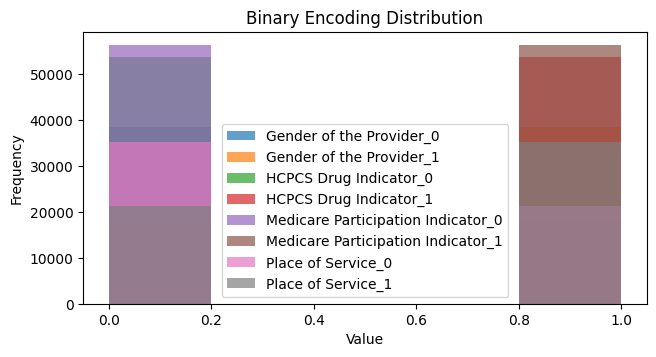

In [317]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
binary_encoded.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('Binary Encoding Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [311]:
#one-Hot Encoding
import numpy as np
oneHot_col = [
    'Country Code of the Provider',
    'State Code of the Provider'
]
encoded_df = pd.get_dummies(df[oneHot_col], drop_first=True)
encoded_df = encoded_df.astype(int).to_numpy()
oneHot_encoded = pd.DataFrame(encoded_df, columns=pd.get_dummies(df[oneHot_col], drop_first=True).columns)
oneHot_encoded.head()

,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,State Code of the Provider_AK,State Code of the Provider_AL,State Code of the Provider_AP,State Code of the Provider_AR,State Code of the Provider_AZ,State Code of the Provider_CA,State Code of the Provider_CO,...,State Code of the Provider_TX,State Code of the Provider_UT,State Code of the Provider_VA,State Code of the Provider_VI,State Code of the Provider_VT,State Code of the Provider_WA,State Code of the Provider_WI,State Code of the Provider_WV,State Code of the Provider_WY,State Code of the Provider_ZZ
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Frequency')

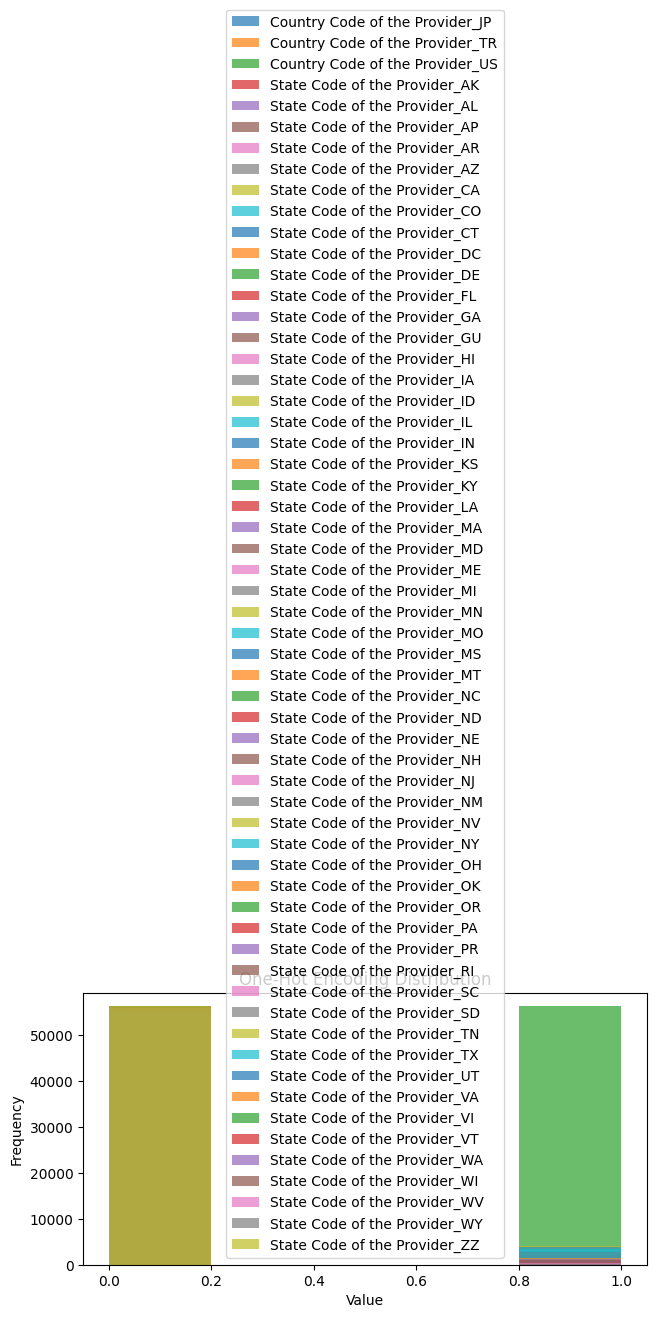

In [319]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 2)
oneHot_encoded.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('One-Hot Encoding Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [312]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encode_columns = [
    'Credentials of the Provider',
    'Provider Type'
    ]
label_encoded_data = {}
le = LabelEncoder()
for col in label_encode_columns:
    df[col] = df[col].fillna('Unknown')
    label_encoded_data[col] = le.fit_transform(df[col])

label_encoded = pd.DataFrame(label_encoded_data)
label_encoded.head()

,Credentials of the Provider,Provider Type
0,323,64
1,684,34
2,300,34
3,300,18
4,485,21


Text(0, 0.5, 'Frequency')

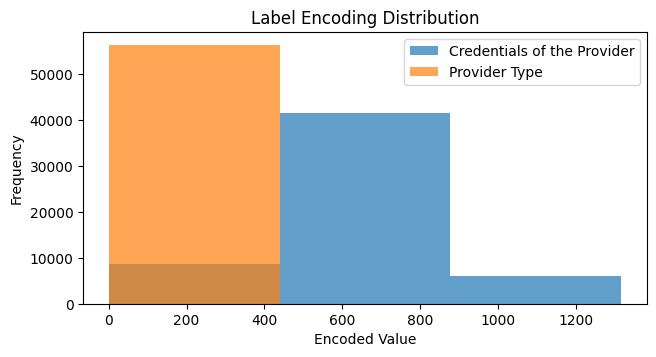

In [326]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 3)
label_encoded.plot(kind='hist', alpha=0.7, bins=3, ax=plt.gca())
plt.title('Label Encoding Distribution')
plt.xlabel('Encoded Value')
plt.ylabel('Frequency')

In [327]:
#Frequency Encoding
freq_col=[
    'City of the Provider',
    'HCPCS Code'
]

freq_encoded = pd.DataFrame()
for col in freq_col:
    frequency_encoded = df[col].value_counts().to_dict()
    freq_encoded[col + '_Encoded'] = df[col].map(frequency_encoded)

freq_encoded.head()

,City of the Provider_Encoded,HCPCS Code_Encoded
2,7,32
3,199,379
4,27,505
6,54,360
7,22,804


Text(0, 0.5, 'Frequency')

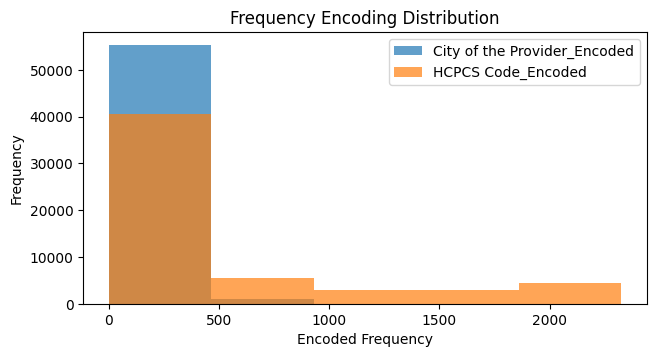

In [328]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 4)
freq_encoded.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('Frequency Encoding Distribution')
plt.xlabel('Encoded Frequency')
plt.ylabel('Frequency')

In [329]:
# Standardizing the numeric columns
from sklearn.preprocessing import StandardScaler
numeric_col = df[['Number of Services', 'Number of Medicare Beneficiaries',
                      'Number of Distinct Medicare Beneficiary/Per Day Services',
                      'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                      'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]

scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(numeric_col), columns=numeric_col.columns)
scaled_numerical = scaled_numerical.round(2)
scaled_numerical.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,-0.27,-0.89,-0.22,0.65,0.01,0.57,0.43
1,-0.72,-0.65,-0.70,-1.23,-1.22,-1.22,-1.22
2,-0.23,-0.36,-0.26,-0.74,-0.93,-0.75,-0.77
3,-0.68,-0.60,-0.66,-0.32,0.08,-0.26,-0.23
4,0.49,0.89,0.58,-0.68,-0.85,-0.48,-0.59


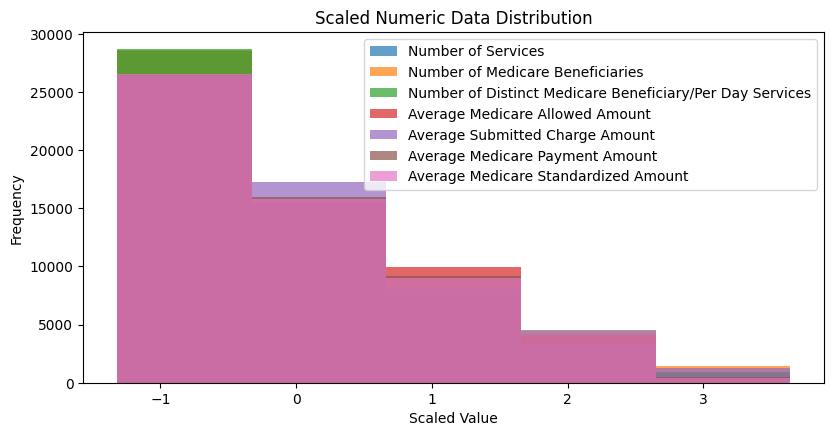

In [330]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 5)
scaled_numeric.plot(kind='hist', alpha=0.7, bins=5, ax=plt.gca())
plt.title('Scaled Numeric Data Distribution')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [331]:
binary_encoded.reset_index(drop=True, inplace=True)
oneHot_encoded.reset_index(drop=True, inplace=True)
label_encoded.reset_index(drop=True, inplace=True)
freq_encoded.reset_index(drop=True, inplace=True)
scaled_numeric.reset_index(drop=True, inplace=True)

In [332]:
final = pd.concat([scaled_numerical,binary_encoded,oneHot_encoded, label_encoded,freq_encoded], axis=1)
final.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_0,Gender of the Provider_1,HCPCS Drug Indicator_0,...,State Code of the Provider_VT,State Code of the Provider_WA,State Code of the Provider_WI,State Code of the Provider_WV,State Code of the Provider_WY,State Code of the Provider_ZZ,Credentials of the Provider,Provider Type,City of the Provider_Encoded,HCPCS Code_Encoded
0,-0.27,-0.89,-0.22,0.65,0.01,0.57,0.43,0,1,0,...,0,0,0,0,0,0,323,64,7,32
1,-0.72,-0.65,-0.70,-1.23,-1.22,-1.22,-1.22,0,1,0,...,0,0,0,0,0,0,684,34,199,379
2,-0.23,-0.36,-0.26,-0.74,-0.93,-0.75,-0.77,0,1,0,...,0,0,0,0,0,0,300,34,27,505
3,-0.68,-0.60,-0.66,-0.32,0.08,-0.26,-0.23,0,1,0,...,0,0,0,0,0,0,300,18,54,360
4,0.49,0.89,0.58,-0.68,-0.85,-0.48,-0.59,0,1,0,...,0,0,0,0,0,0,485,21,22,804
